# Integrais

A derivada de uma função (conhecida "explicitamente") sempre pode ser obtida aplicando-se as diversas regras de derivação.
Assim, até um computador pode calcular _algebricamente_ a derivada de expressões explícitas _arbitrariamente complexas_, como

$$f(x) = \exp(x^3 - \log^2(x)) + \frac{\sin(\tan(1-x))}{\cos(\cos(x) - 2) + 1}.$$

Mas para integrais não é tão simples obter expressões analíticas explícitas.
De fato, desde [um teorema de Liouville de 1835][1],
sabemos que existem funções cuja integral não pode ser expressa em "termos simples".
Por exemplo $f(x) = \exp(-x^2)$ é bastante "simples" em sua expressão, mas não tem uma "integral simples".

[1]: https://en.wikipedia.org/wiki/Liouville%27s_theorem_(differential_algebra)

Portanto, possuir métodos para calcular derivadas numericamente é ainda mais importante.
E, felizmente, há diversos métodos, com bastante precisão.

# Integrais = somas de Riemann

Vamos, aqui, nos concentrar no caso mais simples, mas também mais importante,
do cálculo de uma integral _definida_ de uma função contínua: $$I = \int_a^b f(x) \, dx. $$

Uma tal integral é o limite das _somas de Riemann_: $\int f = \lim_{n\to\infty} S_n$, onde
$$S_n = \sum _ {k = 0}^{n-1} f(x_k) \cdot (d_k - c_k)$$
onde $x_k$ será um ponto do intervalo $J_k = [c_k, d_k]$.
Não apenas devemos ter um número cada vez maior de intervalos,
mas o tamanho deles também deve diminuir:
só garantimos que o limite existe quando o _maior comprimento_ dos intervalos $J_k$ tender a zero.

Assim como fizemos para a derivada, onde "paramos" o limite antes de obter $h = 0$,
vamos também, para a integral, calcular apenas $S_n$ para um $n$ suficientemente grande.
E, também como fizemos para a derivada, vamos usar $h$ como variável principal.
Aqui, $h$ será este "maior comprimento".

## Uma fórmula de Cauchy

Resta, então, ter um critério para escolher os intervalos $J_k$ e os pontos $x_k \in J_k$.
O mais natural para os $J_k$ é tomar todos eles "iguais", ou seja:
$$ c_k = a + kh \quad \text{e}\quad d_k = c_k + h, \qquad \text{onde } h = \frac{b-a}{n}.$$

Já para os $x_k$, o primeiro critério (historicamente) foi dado por Cauchy: $x_k = c_k$.
(Riemann mostrou que não precisávamos de _nenhuma_ regra para os $x_k$:
conquanto os intervalos diminuíssem e a função fosse contínua,
as somas $S_n$ convergiriam para a sua integral.
Mas isso não nos interessa aqui: **precisamos** dar uma regra para o computador poder calcular!)

### Exercício:
Implemente a soma de Cauchy.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def Cauchy_n(f,a,b,n=100):
    """Calcula uma aproximação da integral de $f$ no intervalo $[a,b]$, com $n$ pontos pela fórmula de Cauchy."""
    h = (b-a)/n
    s = np.array([f(a+k*h) * (h) for k in range(n)])
    return np.sum(s)

Cauchy_n2(F,3,6)


300.921075

# Análise de erro

O reflexo básico de toda esta seção será analisar como o erro $S_n - I$ tende a zero quando $n \to \infty$,
ou, o que é o mesmo, quando $h \to 0$.

## Decomposição

A primeira observação quanto ao erro é que este pode ser decomposto em uma _soma_ de $n$ erros diferentes.
Isso porque, da aditividade da integral, temos:
$$\int_a^b f(x) \, dx = \sum _ {k=0}^{n-1} \left( \int _ {c_k}^{d_k} f(x) \, dx \right)
                      = \sum _ {k=0}^{n-1} I _ {n,k}$$
onde, introduzimos a notação $I _ {n,k}$ para as integrais em cada intervalo.
Isso dá uma decomposição de $I$ análoga à fórmula da soma de Cauchy, $S_n = \sum_{k=0}^{n-1} S_{n,k}$.

Assim, o _erro_ da soma de Cauchy será:
$$S_n - I = \sum_k \big( S _ {n,k} - I _ {n,k} \big) = \sum_k e _ {n,k}. $$
Obviamente, alguns erros podem ocorrer por excesso, e outros por falta,
mas devemos nos previnir - matematicamente - para a pior conspiração possível.

## Erro de um termo: análise dos $e_{n,k}$.

Como $f$ é contínua, o valor de $f(x)$ não varia muito dentro de um intervalo $J_k$.
Mais ainda, conforme este intervalo diminui, menor será a variação de $f(x)$.
A diferença entre o mínimo e o máximo de $f$ num intervalo $[x,y]$ é chamada de _oscilação_ de $f$ no intervalo,
muitas vezes denotada $\omega(f;x,y)$.

Lembre, além disso, que a integral é uma "área", e portanto conforme $h$ diminui,
também diminui o intervalo de integração, e com ele o valor da integral $I _ {n,k}$.
Portanto, o erro diminui por duas razões quando $h \to 0$: primeiramente,
porque a função oscila menos num intervalo menor,
segundo, porque a própria integral diminui de magnitude.

Como já estamos treinados para pensar em erros relativos,
percebemos que a diminuição importante do erro na integral
vem da menor oscilação, e não da "simples" redução do intervalo de integração.
Se a oscilação não diminuir, teremos um erro relativo essencialmente igual.

### Uma mudança de variáveis

Vamos aplicar uma mudança de variáveis na integral $I_{n,k}$
para que o intervalo de integração não dependa mais de $h$.
Isso nos dá uma fórmula mais simples para os erros $e_{n,k}$.

Primeiro, a integral:
$$I _ {n,k} = \int _ {c_k}^{d_k = c_k + h} f(x)\,dx
            = \int_0^1 f \big( c_k + th \big) \cdot h \, dt
            = h \int_0^1 f \big( c_k + th \big)  \, dt.$$
E agora, o erro:
$$e _ {n,k} = f(x_k) \cdot h - I _ {n,k} = h \int_0^1 \big( f(x_k) - f(c_k + th) \big) \, dt.$$

Podemos, daí, retirar uma estimativa do erro:
$$
\lvert e _ {n,k} \rvert
   \leq h \int_0^1 \bigl| f(x_k) - f(c_k + th) \bigr| \, dt
   \leq h \int_0^1 \omega(f; c_k, d_k) \, dt
   =    h \cdot \omega(f; c_k, d_k).
$$

## O erro total

Como vimos anteriormente, o erro é a soma dos erros de cada termo,
e poderia ocorrer que todos eles estivessem na mesma direção.
Por isso, no pior dos casos, temos que
$$
\left|S_n - I\right|
   \leq \sum _ {k=0}^{n-1} e _ {n,k}
   \leq h \sum _ {k=0}^{n-1} \omega(f; c_k, d_k).
$$

Como $f$ é contínua, quando $h \to 0$, cada um dos $\omega(f; c_k, d_k)$ diminui.
Iremos, na verdade, estimar ainda mais grosseiramente:
vamos usar $\omega(f;h)$,
que é o máximo da variação de $f$ sobre todos os intervalos de comprimento $h$ dentro de $[a,b]$.
A continuidade _uniforme_ de $f$ no intervalo $[a,b]$ inteiro garante que $\omega(f;h)$
também tende a zero quando $h\to0$.

Assim, temos, para nossa estimativa:
$$\left|S_n - I\right| \leq h \sum _ {k=0}^{n-1} \omega(f;h) = nh \, \omega(f;h).$$
Ora, da definição de $h$ temos que $b - a = nh$, logo:
$$E_n \leq (b-a) \cdot \omega\left(f; \frac{b-a}{n} \right). $$

Nesta fórmula, vemos bem que a importância de $n\to \infty$ (ou, equivalentemente, $h \to 0$)
reside na redução da oscilação da função, nos pequenos intervalos de discretização.
Além disso, como só usamos a _continuidade_ de $f$,
esta estimativa vale qualquer que seja o método de escolha dos pontos $x_k$.

### Exercício: erros de integração

Faça um gráfico do erro de integração de $f(x) = \sin(x)$ no intervalo $[0,\pi]$, em função do número de pontos utilizados.
Como você faria para estimar o erro ao integrar $\exp(-x^2)$ no intervalo $[0,\pi]$?

In [2]:
# Use esta caixa para calcular os erros
def f(x): return np.sin(x)
def g(x): return np.exp(-x**2)

# Sugestão de valores de $n$ para usar
ns = np.array([int(x) for x in np.logspace(1,4)])

### Resposta aqui


NameError: name 'np' is not defined

In [3]:
# E esta caixa para fazer o gráfico
### Resposta aqui


Refaça o gráfico para a integral no intervalo $[0,1]$.
O que aconteceu?

In [5]:
# Use esta caixa para calcular os erros
### Resposta aqui


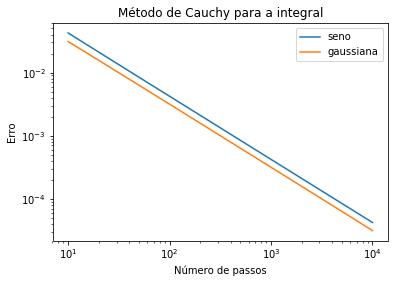

In [6]:
# E esta caixa para fazer o gráfico
### Resposta aqui


### Exercício: tempo de cálculo

Compare o tempo de cálculo da fórmula de Cauchy com $10^6$ pontos,
na forma vetorizada e na forma iterativa, para a função $g$.

In [7]:
### Resposta aqui


10 loops, best of 3: 98.6 ms per loop
1 loop, best of 3: 1.42 s per loop
